In [1]:
import trimesh, random
from tqdm.notebook import tqdm
import numpy as np
import fs.osfs
import fs.zipfs
import fs.path
import glob
import pathlib

In [2]:
import matplotlib.pyplot as plt
def display_stats(a, title):
    _ = plt.hist(np.minimum(a, 64), bins="auto")  # arguments are passed to np.histogram
    plt.title(title)
    # plt.xlabel("Collision mesh count")
    # plt.ylabel("# objects with this collision mesh count")
    plt.show()
    print("Median", np.median(a))
    print("Mean", np.mean(a))
    print("Std", np.std(a))
    print("Max", np.max(a))
    print("Min", np.min(a))

In [3]:
# dataset = fs.zipfs.ZipFS(r"D:\ig_pipeline\artifacts\og_dataset.zip")
# dataset = fs.zipfs.ZipFS(r"D:\ig_pipeline\artifacts\parallels\vertex_reduction.zip")
dataset = fs.osfs.OSFS(r"D:\ig_pipeline\artifacts\aggregate")

In [4]:
collision_objs = [x.path for x in dataset.glob(r"objects/walls/*/shape/collision/*.obj")]
# collision_objs = glob.glob(r"D:\ig_pipeline\artifacts\aggregate\objects\*\*\shape\collision\*.obj")
# collision_objs = glob.glob(r"C:\Users\Cem\Downloads\redux\*\*\shape\collision\*.obj")
print(len(collision_objs))
random.shuffle(collision_objs)

331


## Count Collision Hulls

In [5]:
import io

# Count the number of o-directives in each
o_directives = {}
failed = []
for p in tqdm(collision_objs):
    parts = fs.path.parts(p)
    target = parts[-5] + "-" + parts[-4]
    
    with dataset.open(p, "rb") as f:
        bio = io.BytesIO(f.read())
        
    m = trimesh.load(bio, file_type="obj", force="mesh", skip_material=True)
    submeshes = m.split(only_watertight=False)
    for s in submeshes:
        if not s.is_watertight:
            s.show()
        
        
    for submesh in submeshes:
        if len(submesh.vertices) > 60:
            print(p, "has mesh with", len(submesh.vertices), "vertices")
            failed.append(target)
    o_directives[target] = len(submeshes)

  0%|          | 0/331 [00:00<?, ?it/s]

/objects/walls/pefrto/shape/collision/walls-pefrto-base_link.obj has mesh with 61 vertices
/objects/walls/pefrto/shape/collision/walls-pefrto-base_link.obj has mesh with 73 vertices
/objects/walls/pefrto/shape/collision/walls-pefrto-base_link.obj has mesh with 85 vertices
/objects/walls/pefrto/shape/collision/walls-pefrto-base_link.obj has mesh with 82 vertices
/objects/walls/pefrto/shape/collision/walls-pefrto-base_link.obj has mesh with 62 vertices
/objects/walls/pefrto/shape/collision/walls-pefrto-base_link.obj has mesh with 70 vertices
/objects/walls/zoonsb/shape/collision/walls-zoonsb-base_link.obj has mesh with 63 vertices
/objects/walls/zoonsb/shape/collision/walls-zoonsb-base_link.obj has mesh with 83 vertices
/objects/walls/zoonsb/shape/collision/walls-zoonsb-base_link.obj has mesh with 81 vertices


unable to load materials from: decomp.mtl
Traceback (most recent call last):
  File "C:\Users\Cem\.conda\envs\pipeline\lib\site-packages\trimesh\exchange\obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable
specified material (Material031)  not loaded!
specified material (Material030)  not loaded!
specified material (Material029)  not loaded!
specified material (Material028)  not loaded!
specified material (Material027)  not loaded!
specified material (Material026)  not loaded!
specified material (Material025)  not loaded!
specified material (Material024)  not loaded!
specified material (Material023)  not loaded!
specified material (Material022)  not loaded!
specified material (Material021)  not loaded!
specified material (Material020)  not loaded!
specified material (Material019)  not loaded!
specified material (Material018)  not loaded!
specified material (Material017)  not loaded!
specified material (Mate

/objects/walls/hqpeoy/shape/collision/walls-hqpeoy-base_link.obj has mesh with 92 vertices
/objects/walls/hqpeoy/shape/collision/walls-hqpeoy-base_link.obj has mesh with 65 vertices
/objects/walls/hqpeoy/shape/collision/walls-hqpeoy-base_link.obj has mesh with 64 vertices
/objects/walls/luowiu/shape/collision/walls-luowiu-base_link.obj has mesh with 128 vertices
/objects/walls/krpumb/shape/collision/walls-krpumb-base_link.obj has mesh with 116 vertices
/objects/walls/fuuaks/shape/collision/walls-fuuaks-base_link.obj has mesh with 96 vertices
/objects/walls/fuuaks/shape/collision/walls-fuuaks-base_link.obj has mesh with 68 vertices
/objects/walls/fuuaks/shape/collision/walls-fuuaks-base_link.obj has mesh with 68 vertices
/objects/walls/ipzkkp/shape/collision/walls-ipzkkp-base_link.obj has mesh with 113 vertices
/objects/walls/ipzkkp/shape/collision/walls-ipzkkp-base_link.obj has mesh with 64 vertices
/objects/walls/ipzkkp/shape/collision/walls-ipzkkp-base_link.obj has mesh with 82 verti

/objects/walls/kabquv/shape/collision/walls-kabquv-base_link.obj has mesh with 94 vertices
/objects/walls/kabquv/shape/collision/walls-kabquv-base_link.obj has mesh with 75 vertices
/objects/walls/kabquv/shape/collision/walls-kabquv-base_link.obj has mesh with 91 vertices
/objects/walls/kabquv/shape/collision/walls-kabquv-base_link.obj has mesh with 78 vertices
/objects/walls/kabquv/shape/collision/walls-kabquv-base_link.obj has mesh with 70 vertices
/objects/walls/kabquv/shape/collision/walls-kabquv-base_link.obj has mesh with 69 vertices
/objects/walls/pcboew/shape/collision/walls-pcboew-base_link.obj has mesh with 68 vertices
/objects/walls/pcboew/shape/collision/walls-pcboew-base_link.obj has mesh with 100 vertices
/objects/walls/adqmpz/shape/collision/walls-adqmpz-base_link.obj has mesh with 66 vertices
/objects/walls/adqmpz/shape/collision/walls-adqmpz-base_link.obj has mesh with 134 vertices
/objects/walls/mhguff/shape/collision/walls-mhguff-base_link.obj has mesh with 77 vertic

/objects/walls/qrskkp/shape/collision/walls-qrskkp-base_link.obj has mesh with 87 vertices
/objects/walls/qrskkp/shape/collision/walls-qrskkp-base_link.obj has mesh with 92 vertices
/objects/walls/qrskkp/shape/collision/walls-qrskkp-base_link.obj has mesh with 75 vertices
/objects/walls/llgahv/shape/collision/walls-llgahv-base_link.obj has mesh with 134 vertices
/objects/walls/wcekyw/shape/collision/walls-wcekyw-base_link.obj has mesh with 112 vertices
/objects/walls/ztifms/shape/collision/walls-ztifms-base_link.obj has mesh with 68 vertices
/objects/walls/ztifms/shape/collision/walls-ztifms-base_link.obj has mesh with 116 vertices
/objects/walls/loxfub/shape/collision/walls-loxfub-base_link.obj has mesh with 109 vertices
/objects/walls/loxfub/shape/collision/walls-loxfub-base_link.obj has mesh with 77 vertices
/objects/walls/loxfub/shape/collision/walls-loxfub-base_link.obj has mesh with 94 vertices
/objects/walls/pquwwj/shape/collision/walls-pquwwj-base_link.obj has mesh with 67 vert

/objects/walls/nsyzcf/shape/collision/walls-nsyzcf-base_link.obj has mesh with 92 vertices
/objects/walls/nsyzcf/shape/collision/walls-nsyzcf-base_link.obj has mesh with 79 vertices
/objects/walls/bbokbs/shape/collision/walls-bbokbs-base_link.obj has mesh with 126 vertices
/objects/walls/guswuo/shape/collision/walls-guswuo-base_link.obj has mesh with 138 vertices
/objects/walls/vrkkum/shape/collision/walls-vrkkum-base_link.obj has mesh with 116 vertices
/objects/walls/szxayl/shape/collision/walls-szxayl-base_link.obj has mesh with 88 vertices
/objects/walls/szxayl/shape/collision/walls-szxayl-base_link.obj has mesh with 73 vertices
/objects/walls/wrxyby/shape/collision/walls-wrxyby-base_link.obj has mesh with 78 vertices
/objects/walls/wrxyby/shape/collision/walls-wrxyby-base_link.obj has mesh with 116 vertices
/objects/walls/nqtojt/shape/collision/walls-nqtojt-base_link.obj has mesh with 106 vertices
/objects/walls/xumdqs/shape/collision/walls-xumdqs-base_link.obj has mesh with 112 ve

/objects/walls/ubdyfk/shape/collision/walls-ubdyfk-base_link.obj has mesh with 92 vertices
/objects/walls/ubdyfk/shape/collision/walls-ubdyfk-base_link.obj has mesh with 62 vertices
/objects/walls/ubdyfk/shape/collision/walls-ubdyfk-base_link.obj has mesh with 73 vertices
/objects/walls/ubdyfk/shape/collision/walls-ubdyfk-base_link.obj has mesh with 68 vertices
/objects/walls/ubdyfk/shape/collision/walls-ubdyfk-base_link.obj has mesh with 67 vertices
/objects/walls/yrcjvs/shape/collision/walls-yrcjvs-base_link.obj has mesh with 74 vertices
/objects/walls/yrcjvs/shape/collision/walls-yrcjvs-base_link.obj has mesh with 65 vertices
/objects/walls/bgoxzh/shape/collision/walls-bgoxzh-base_link.obj has mesh with 112 vertices
/objects/walls/insggh/shape/collision/walls-insggh-base_link.obj has mesh with 74 vertices
/objects/walls/insggh/shape/collision/walls-insggh-base_link.obj has mesh with 69 vertices
/objects/walls/pziwqm/shape/collision/walls-pziwqm-base_link.obj has mesh with 142 vertic

/objects/walls/bntgiu/shape/collision/walls-bntgiu-base_link.obj has mesh with 111 vertices
/objects/walls/bntgiu/shape/collision/walls-bntgiu-base_link.obj has mesh with 68 vertices
/objects/walls/odbsjx/shape/collision/walls-odbsjx-base_link.obj has mesh with 81 vertices
/objects/walls/ebolxd/shape/collision/walls-ebolxd-base_link.obj has mesh with 109 vertices
/objects/walls/ebolxd/shape/collision/walls-ebolxd-base_link.obj has mesh with 70 vertices
/objects/walls/ebolxd/shape/collision/walls-ebolxd-base_link.obj has mesh with 103 vertices
/objects/walls/oqlnfz/shape/collision/walls-oqlnfz-base_link.obj has mesh with 104 vertices
/objects/walls/dbcxft/shape/collision/walls-dbcxft-base_link.obj has mesh with 111 vertices
/objects/walls/dbcxft/shape/collision/walls-dbcxft-base_link.obj has mesh with 64 vertices
/objects/walls/dbcxft/shape/collision/walls-dbcxft-base_link.obj has mesh with 77 vertices
/objects/walls/bpaayh/shape/collision/walls-bpaayh-base_link.obj has mesh with 120 ve

In [6]:
print(sorted(o_directives.items(), key=lambda x: -x[1]))

[('walls-uwsqqu', 34), ('walls-qisxmx', 30), ('walls-gfxhgi', 23), ('walls-ioxzum', 22), ('walls-jukzkm', 17), ('walls-qannys', 17), ('walls-dekben', 15), ('walls-kabquv', 14), ('walls-axhynp', 14), ('walls-eugiyg', 14), ('walls-zoonsb', 13), ('walls-hosciu', 13), ('walls-hnqegn', 12), ('walls-bdxwvm', 11), ('walls-yeodqe', 11), ('walls-wycsdd', 11), ('walls-pquwwj', 10), ('walls-ugemkf', 10), ('walls-djfood', 10), ('walls-kvmewy', 10), ('walls-nvtvxi', 10), ('walls-dthtvd', 10), ('walls-ddswbg', 9), ('walls-pefrto', 8), ('walls-eyalcx', 8), ('walls-hukjxe', 8), ('walls-hfwelb', 8), ('walls-exiopd', 8), ('walls-zrhulr', 8), ('walls-yjbruo', 8), ('walls-yrcjvs', 8), ('walls-insggh', 8), ('walls-ggcuux', 8), ('walls-dondsu', 8), ('walls-xamxbe', 8), ('walls-dzlwbx', 7), ('walls-nthwqa', 7), ('walls-iwipoh', 7), ('walls-ywzpuk', 7), ('walls-wpqxxx', 7), ('walls-qysmts', 7), ('walls-frmaew', 7), ('walls-joztgu', 7), ('walls-uzzssc', 7), ('walls-iqbzlu', 7), ('walls-vdzmpj', 7), ('walls-jiu

In [9]:
for k, v in o_directives.items():
    if v > 100:
        print(k, "has", v, "hulls")

oven-tllnvs has 148 hulls


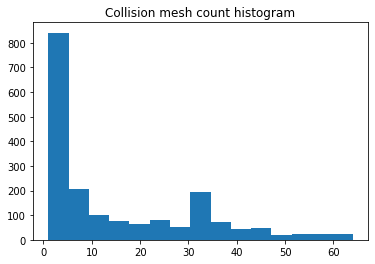

Median 7.0
Mean 15.067451820128479
Std 16.373215139999168
Max 148
Min 1


In [10]:
a = np.array(list(o_directives.values()))
display_stats(a, "Collision mesh count histogram")

## Analyze bounding box volumes

In [11]:
col_vols = {}
vis_vols = {}
bb_volume_ratios = {}
bb_max_nonzero_dim_ratios = {}
filtered_objs = collision_objs  # [x for x in collision_objs if "floors" in x]
watertight = 0
for col_name in tqdm(filtered_objs):
    col_name = pathlib.Path(col_name)
    target = col_name.parts[-5] + "-" + col_name.parts[-4]
    vis_name = pathlib.Path(str(col_name).replace("collision", "visual"))
    col_mesh = trimesh.load(col_name, force="mesh", skip_material=True)
    vis_mesh = trimesh.load(vis_name, force="mesh", skip_material=True, merge_tex=True, merge_norm=True)
    if vis_mesh.is_volume:
        watertight += 1
    
    col_bb = col_mesh.bounding_box.extents
    vis_bb = vis_mesh.bounding_box.extents
    
    col_vol = np.product(col_bb)
    vis_vol = np.product(vis_bb)
    
    col_vols[target] = col_vol
    vis_vols[target] = vis_vol
    bb_volume_ratios[target] = col_vol / vis_vol
    
    dim_ratio = col_bb / vis_bb
    invalid_dims = np.isclose(vis_bb, 0, atol=1e-3)
    if np.all(invalid_dims):
        print(f"Error: {target} bb's all dimensions are close to zero, can't include it:", vis_bb)
        continue
    elif np.any(invalid_dims):
        print(f"Warning: {target} bb has dimension close to zero:", vis_bb)
    bb_max_nonzero_dim_ratios[target] = np.max(dim_ratio[~invalid_dims])

  0%|          | 0/2491 [00:00<?, ?it/s]

ValueError: string is not a file: D:\objects\coffee_table\elhvfw\shape\collision\coffee_table-elhvfw-link_3.obj

In [ ]:
print("Total", len(filtered_objs))
print("Watertight", watertight)
print("Ratio", watertight / len(filtered_objs))

In [ ]:
a = np.array(list(col_vols.values()))
display_stats(np.log(a), "Collision bounding box volume histogram")

In [ ]:
a = np.array(list(vis_vols.values()))
display_stats(np.log(a), "Visual bounding box volume histogram")

In [ ]:
a = np.array(list(bb_volume_ratios.values()))
display_stats(a, "Collision-to-visual bounding box volume ratio histogram")

In [ ]:
a = np.array(list(bb_max_nonzero_dim_ratios.values()))
display_stats(a, "Maximum collision-to-visual bounding box non-zero dimension ratio histogram")

## Objects with too many links

In [ ]:
import sys
sys.path.append(r"D:\ig_pipeline")
from b1k_pipeline.utils import get_targets, PIPELINE_ROOT, parse_name

In [ ]:
import json
from collections import defaultdict
# Count the number of objects with non-tagged fixed links
link_cnts = {}
for target in tqdm.tqdm(get_targets("combined")):
    obj_list_file = PIPELINE_ROOT / "cad" / target / "artifacts" / "object_list.json"
    assert obj_list_file.exists(), "Missing obj list file " + str(obj_list_file)
    with open(obj_list_file, "r") as f:
        data = json.load(f)
        meshes = data["meshes"]
        parsed = [parse_name(x) for x in meshes]
        obj_link_cnts = defaultdict(set)
        for p in parsed:
            if not p.group("link_name") or p.group("link_name") == "base_link":
                continue
            if p.group("bad"):
                continue
            obj_name = p.group("obj_basename")
            link_name = p.group("link_basename")
            # Don't count openable links
            if p.group("tag") and "openable" in p.group("tag"):
                continue
            obj_link_cnts[obj_name].add(link_name)
        # fixed = sum(1 for x in parsed if x is not None and x.group("joint_type") == "F" and not x.group("tag"))
        link_cnts.update({x: len(y) for x, y in obj_link_cnts.items()})

In [ ]:
interesting = np.asarray(list(link_cnts.values()), dtype=int)
interesting = interesting[interesting>3]
display_stats(a, "Collision-to-visual bounding box volume ratio histogram")

In [ ]:
print("\n".join(str(x) for x in sorted(link_cnts.items(), key=lambda x: -x[1])))

In [ ]:
m = trimesh.load(r"C:\Users\Cem\Downloads\test-fridge\alarm-dkwmmf-base_link.obj", force="mesh", skip_material=True, merge_tex=True, merge_norm=True)

In [ ]:
len(m.split())